<a href="https://colab.research.google.com/github/sergiyromanenko/CV-HW/blob/master/lesson_15/homework/Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HOMEWORK 14

In this homework we will be working with the Fashion MNIST dataset. You will be given a classifier which suffers from considerable overfitting. Your objective will be to employ regularization techniques to mitigate the overfitting problem.

Let's start with the usual imports.

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, BatchNormalization
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Dataset

The MNIST fashgion dataset [link](https://github.com/zalandoresearch/fashion-mnist) was build by Zalando Reasearch tem consists of monochrome images of different type of clothing, namely:
* 0	T-shirt/top
* 1	Trouser
* 2	Pullover
* 3	Dress
* 4	Coat
* 5	Sandal
* 6	Shirt
* 7	Sneaker
* 8	Bag
* 9	Ankle boot

It is also one of the Keras built-in datasets. Let's load the images and quickly inspect it.

In [11]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


Let's visualise some random samples.

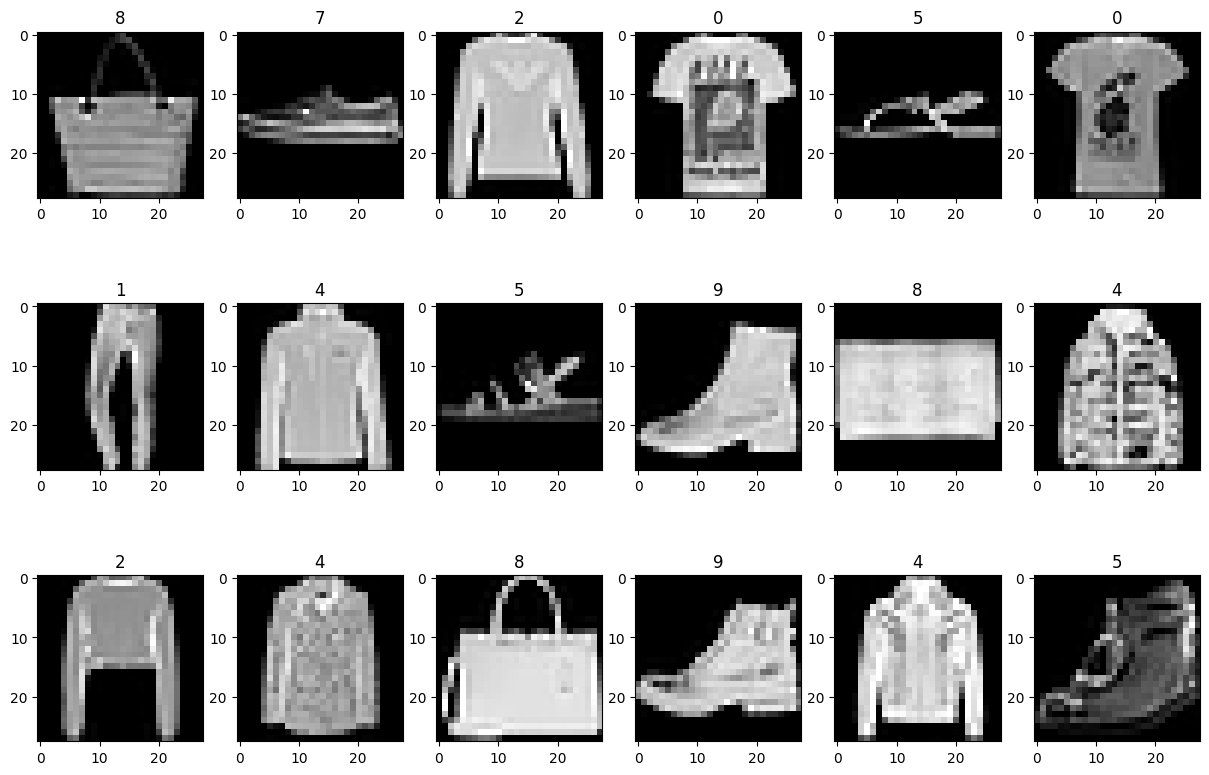

In [3]:
cnt = 1
for r in range(3):
    for c in range(6):
        idx = np.random.randint(len(x_train))
        plt.subplot(3,6,cnt)
        plt.imshow(x_train[idx, ...], cmap='gray')
        plt.title(y_train[idx])
        cnt = cnt + 1

### Building the Classifier

We are now going to build the baseline classifier that you will use throughout this homework.

In [ ]:
# Data normalization
x_train = x_train/255
x_test = x_test/255

In [ ]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 flatten_7 (Flatten)         (None, 25088)             0         
                                                                 
 dense_14 (Dense)            (None, 128)               3211392   
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 3213002 (12.26 MB)
Trainable params: 3213002 (12.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
938/938 [==============================] - 8s 5ms/step - loss: 0.3739 - accuracy: 0.8676 - val_loss: 0.3193 - val_accuracy: 0.8870
Epoch 2/50
938/938 [==============================] - 4s 4ms/step - loss: 0.2562 - accuracy: 0.9090 - val_loss: 0.2944 - val_accuracy: 0.8952
Epoch 3/50
938/938 [==============================] - 4s 5ms/step - loss: 0.2152 - accuracy: 0.9221 - val_loss: 0.3023 - val_accuracy: 0.8975
Epoch 4/50
938/938 [==============================] - 4s 4ms/step - loss: 0.1854 - accuracy: 0.9330 - val_loss: 0.3053 - val_accuracy: 0.8996
Epoch 5/50
938/938 [==============================] - 4s 4ms/step - loss: 0.1617 - accuracy: 0.9416 - val_loss: 0.3237 - val_accuracy: 0.8975
Epoch 6/50
938/938 [==============================] - 4s 5ms/step - loss: 0.1448 - accuracy: 0.9482 - val_loss: 0.3296 - val_accuracy: 0.8982
Epoch 7/50
938/938 [==============================] - 4s 4ms/step - loss: 0.1280 - accuracy: 0.9527 - val_loss: 0.3516 - val_accuracy: 0.8957
Epoch 

Train Acc      0.9959666728973389
Validation Acc 0.8827000260353088


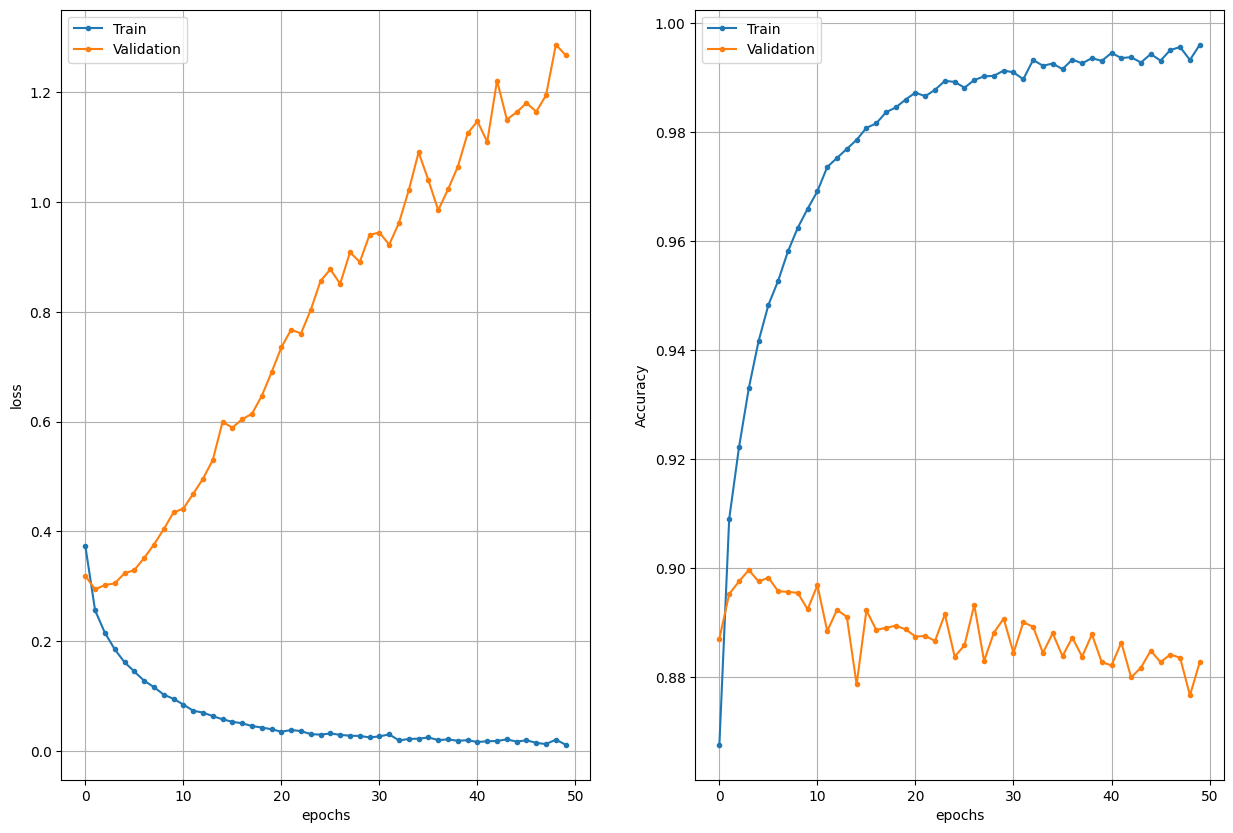

In [ ]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])

    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])

plot_history(history)

As you can see, the classifier suffers from massive overfitting. The validation accuracy is around 88% while the training accuracy is close to 1.

### Combat the Overfitting!

Now it is your turn. Use the classifier as a baseline, include some regularization techniques and try to improve the classification performance. You can try any techniques you might see fit, e.g.,
* Dropout
* Batch normalization
* Weight regularization
* Data augmentation
* Early stopping
* Pooling
* Reducing the number of parameters (the size of the network)
* ...

There are to objective you shall fulfill in order to successfully complete this homework:
* The validation accuracy shall be above 91%
* Your network (with all the regularizations applied) shall **not** be larger than the baseline

In [12]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]


print('Train set:      ', len(y_train), 'samples')
print('Test set:       ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:       60000 samples
Test set:        10000 samples
Sample dims:  (60000, 28, 28)


In [13]:
# Data normalization
x_train = x_train/255
x_test = x_test/255

# Modify the baseline classifier in order to reduce the overfitting and make the performance more robust

inputs = Input(shape=(28, 28, 1))
net = Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.5)(net)
net = Flatten()(net)
net = Dense(64, activation='relu')(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 flatten_3 (Flatten)         (None, 12544)             0         
                                                                 
 dense_6 (Dense)             (None, 64)                802880    
                                                           

In [14]:
# Train the network
epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
938/938 [==============================] - 77s 81ms/step - loss: 0.4353 - accuracy: 0.8454 - val_loss: 0.3324 - val_accuracy: 0.8850
Epoch 2/50
938/938 [==============================] - 73s 78ms/step - loss: 0.3134 - accuracy: 0.8885 - val_loss: 0.2948 - val_accuracy: 0.8918
Epoch 3/50
938/938 [==============================] - 73s 78ms/step - loss: 0.2775 - accuracy: 0.8989 - val_loss: 0.2926 - val_accuracy: 0.8921
Epoch 4/50
938/938 [==============================] - 75s 80ms/step - loss: 0.2517 - accuracy: 0.9075 - val_loss: 0.2606 - val_accuracy: 0.9036
Epoch 5/50
938/938 [==============================] - 72s 76ms/step - loss: 0.2315 - accuracy: 0.9145 - val_loss: 0.2555 - val_accuracy: 0.9062
Epoch 6/50
938/938 [==============================] - 73s 78ms/step - loss: 0.2150 - accuracy: 0.9199 - val_loss: 0.2458 - val_accuracy: 0.9091
Epoch 7/50
938/938 [==============================] - 70s 75ms/step - loss: 0.2008 - accuracy: 0.9248 - val_loss: 0.2410 - val_accuracy:

Train Acc      0.9795666933059692
Validation Acc 0.9193999767303467


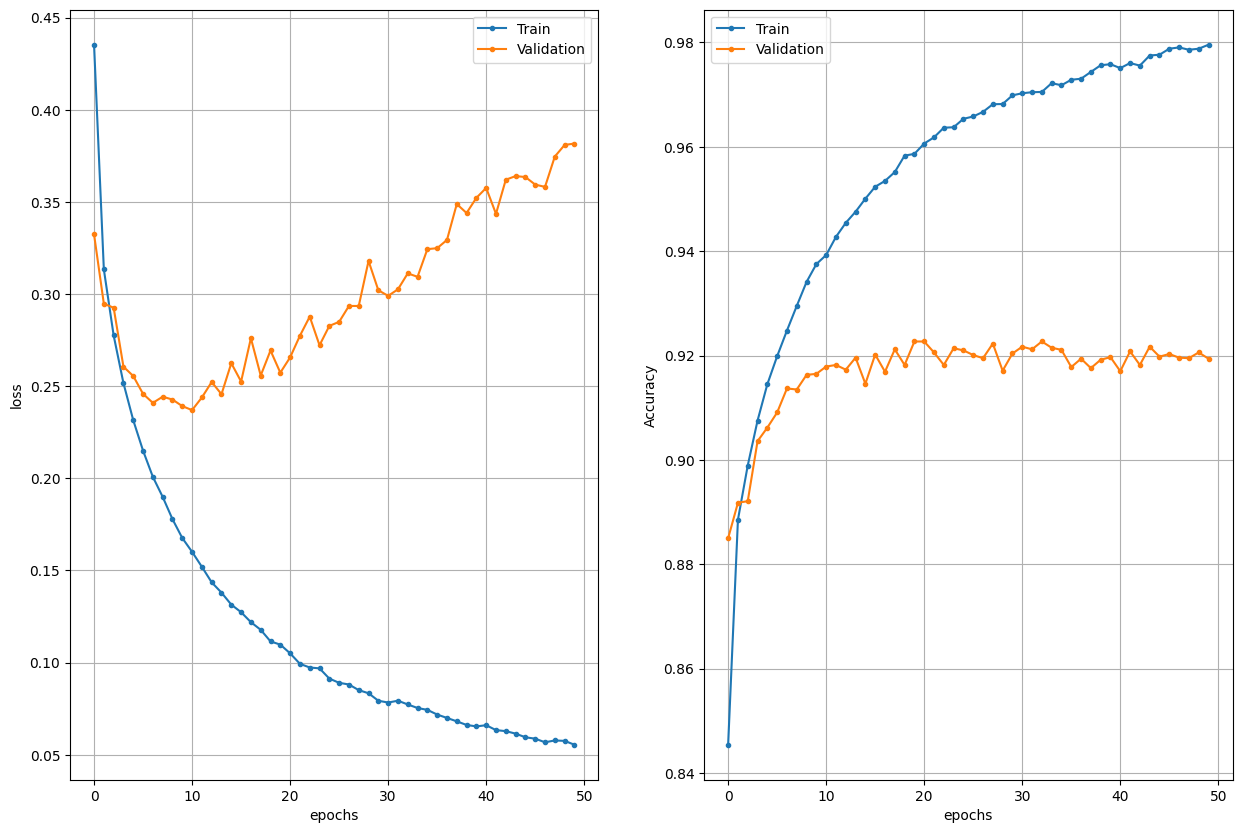

In [16]:
# Show the results

def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])

    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])

plot_history(history)


###I will try to do data augmentation

As a next step, data augmentation is applied.
Note that data augmentation is applied only to training data.

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, BatchNormalization
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]


print('Train set:      ', len(y_train), 'samples')
print('Test set:       ', len(y_test), 'samples')
print('Sample dims: ',   x_train.shape)

Train set:       60000 samples
Test set:        10000 samples
Sample dims:  (60000, 28, 28)


In [ ]:
# Reshape data for convlution network
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Convert from 'uint8' to 'float32' and normalise the data to (0,1)
x_train =  x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

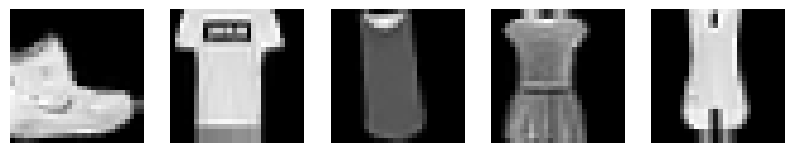

Training data shape: (60000, 28, 28, 1)
Training target shape: (60000,)
Testing data shape: (10000, 28, 28, 1)
Testing target shape: (10000,)


In [ ]:
# Data Augmentation
# source https://secantzhang.github.io/blog/deep-learning-fashion-mnist

from tensorflow.keras.preprocessing.image import ImageDataGenerator

def random_reverse(x):
    if np.random.random() > 0.5:
        return x[:,::-1]
    else:
        return x

def data_generator(X, Y, batch_size=100):
    while True:
        idxs = np.random.permutation(len(X))
        X = X[idxs]
        Y = Y[idxs]
        p, q = [], []
        for i in range(len(X)):
            p.append(random_reverse(X[i]))
            q.append(Y[i])
            if len(p) == batch_size:
                yield np.array(p), np.array(q)
                p, q = [], []
        if p:
            yield np.array(p), np.array(q)
            p, q = [], []


datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,  # randomly flip images
)

# Visualize some augmented images
num_samples = 5
plt.figure(figsize=(10, 10))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    augmented_img = datagen.random_transform(x_train[i])
    plt.imshow(augmented_img, cmap='gray')
    plt.axis('off')
plt.show()

# Confirming the shape of the preprocessed data
print(f"Training data shape: {x_train.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing data shape: {x_test.shape}")
print(f"Testing target shape: {y_test.shape}")




In [ ]:
# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Modify the baseline classifier in order to reduce the overfitting and make the performance more robust

inputs = Input(shape=(28, 28, 1))
net = Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.5)(net)
net = Flatten()(net)
net = Dense(32, activation='relu')(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 flatten_9 (Flatten)         (None, 12544)             0         
                                                                 
 dense_18 (Dense)            (None, 32)                401440    
                                                           

In [ ]:
# Train the network
epochs = 50
batch_size = 64

steps_per_epoch = len(y_train) // batch_size
generator = datagen.flow(x_train, y_train, batch_size=batch_size)
print(x_train.shape)

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

start = time()
history = model.fit(generator, steps_per_epoch=steps_per_epoch, epochs=epochs, validation_data=(x_test, y_test))
print('Elapsed time', time() - start)



(60000, 28, 28, 1)
Epoch 1/50
937/937 [==============================] - 72s 76ms/step - loss: 0.7182 - accuracy: 0.7370 - val_loss: 0.4796 - val_accuracy: 0.8288
Epoch 2/50
937/937 [==============================] - 70s 75ms/step - loss: 0.5464 - accuracy: 0.7977 - val_loss: 0.4480 - val_accuracy: 0.8392
Epoch 3/50
937/937 [==============================] - 71s 76ms/step - loss: 0.5108 - accuracy: 0.8108 - val_loss: 0.4226 - val_accuracy: 0.8444
Epoch 4/50
937/937 [==============================] - 69s 74ms/step - loss: 0.4856 - accuracy: 0.8196 - val_loss: 0.4011 - val_accuracy: 0.8574
Epoch 5/50
937/937 [==============================] - 70s 74ms/step - loss: 0.4674 - accuracy: 0.8269 - val_loss: 0.3922 - val_accuracy: 0.8609
Epoch 6/50
937/937 [==============================] - 70s 75ms/step - loss: 0.4523 - accuracy: 0.8321 - val_loss: 0.3921 - val_accuracy: 0.8601
Epoch 7/50
937/937 [==============================] - 69s 74ms/step - loss: 0.4384 - accuracy: 0.8363 - val_loss: 0.3

KeyboardInterrupt: 

### Questions

* What have you done in order to improve the performance?

Dropout
Data augmentation
Pooling

* Have you tried configurations that did not work out?

1) Did not work good this:

 A) (32 filters,  0.2 Dropout):

    inputs = Input(shape=(28, 28, 1))
    net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
    net = MaxPooling2D(pool_size=(2, 2))(net)
    net = Dropout(0.2)(net)
    net = Flatten()(net)
    net = Dense(32)(net)
    outputs = Dense(10, activation="softmax")(net)

it was 0.90 Accuracy

B) it works in better with this modification (128 filters, 0.5 Dropout):

    inputs = Input(shape=(28, 28, 1))
    net = Conv2D(128, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
    net = MaxPooling2D(pool_size=(2, 2))(net)
    net = Dropout(0.5)(net)
    net = Flatten()(net)
    net = Dense(32, activation='relu')(net)
    outputs = Dense(10, activation="softmax")(net)

after that it was 0.9107 Accuracy

C) it works in better with this modification (64 filters, 0.5 Dropout):

    inputs = Input(shape=(28, 28, 1))
    net = Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
    net = MaxPooling2D(pool_size=(2, 2))(net)
    net = Dropout(0.5)(net)
    net = Flatten()(net)
    net = Dense(64, activation='relu')(net)
    outputs = Dense(10, activation="softmax")(net)

after that it was 0.9107 Accuracy

2) with Data augmentation - 0.88 Accuracy